In [1]:
%pip install pandas numpy matplotlib scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
from glob import glob

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from IPython.display import Markdown, display

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

import sys
sys.path.append('.')
from roco2_python import color, marker, plot, Kernel

In [3]:
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = (20,10)
pylab.rcParams['font.size'] = 20
pylab.rcParams['legend.fontsize'] = 20
def printmd(string):
    display(Markdown(string))

In [4]:
filename = './results/2025-07-23.csv'

experiments = pd.read_csv(filename, sep=',')
experiments

,experiment,frequency,shell,threads,utility,op1,op2,ipc-estimate,metricq,perf-freq,perf-ipc,sysfs-powercap-rapl,sysfs-powercap-rapl/package-0,sysfs-powercap-rapl/package-0-dram,sysfs-powercap-rapl/package-1,sysfs-powercap-rapl/package-1-dram
0,2,0,0,112,1,0,0,0.0,931.787234,0.000000,NaN,263.544052,115.403466,12.445083,124.289206,11.406148
1,4,0,0,14,623130118,0,0,0.0,936.479167,0.795882,2.671336,267.537526,119.368222,12.438613,124.305848,11.425058
2,5,0,0,14,170611,0,0,0.0,941.640000,0.795841,5.448679,271.445484,123.298715,12.455073,124.286166,11.405530
3,8,0,0,14,871,0,0,0.0,944.784314,0.795119,3.476081,275.610356,124.285134,15.588678,124.349246,11.387033
4,14,0,0,14,630,0,0,0.0,947.800000,0.794856,4.686148,275.962131,124.492109,15.672357,124.427276,11.372399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,13,0,2,56,1622,0,0,0.0,1360.520000,2.990509,1.803130,627.556693,349.801438,51.702491,214.710917,11.341489
323,3,0,2,56,83811,0,0,0.0,1266.938776,2.994796,2.121758,548.739923,309.786121,12.856051,214.715563,11.382486
324,9,0,2,56,83644,0,0,0.0,1264.040816,2.994679,2.112501,545.125306,306.295464,12.729806,214.716935,11.383065
325,11,0,2,56,18665,0,0,0.0,1214.244898,2.994752,0.064481,504.198055,265.348260,12.802438,214.679955,11.367512


In [5]:
power_patterns = {
    'metricq': 'Reference Measurement [W]',
    'sysfs-powercap-rapl': 'RAPL Package + DRAM [W]',
    'perf-freq': 'Average CPU frequency [GHz]',
    'threads': 'Number of threads'
}

pattern_x = 'sysfs-powercap-rapl'
pattern_y = 'metricq'

experiments[pattern_x] = list(map(float, experiments[pattern_x]))
experiments[pattern_y] = list(map(float, experiments[pattern_y]))

experiment_basename = os.path.splitext(os.path.basename(filename))[0]
printmd("### Number of experiments in {}: {}".format(experiment_basename, len(experiments)))

label_x = power_patterns[pattern_x]
label_y = power_patterns[pattern_y]
power_x_columns = experiments.filter(regex=pattern_x)
power_y_columns = experiments.filter(regex=pattern_y)
printmd("### Using X-{} power metrics: {} [{}]" \
        .format(label_x, pattern_x, ', '.join(power_x_columns.columns.values)))
printmd("### Using Y-{} power metrics: {} [{}]" \
        .format(label_y, pattern_y, ', '.join(power_y_columns.columns.values)))

experiments['kernel'] = experiments.experiment.apply(Kernel)

experiments['power_x'] = power_x_columns.sum(1)
experiments['power_y'] = power_y_columns.sum(1)
experiments['frequency_mhz'] = (experiments['frequency'] / 1e6).astype(int)

printmd('### Kernels:')
printmd('\n'.join([' * {}'.format(x) for x in experiments.kernel.unique()]))

printmd('### Frequencies:')
printmd('\n'.join([' * {}'.format(x) for x in experiments.frequency_mhz.unique()]))

printmd('### Thread counts:')
printmd('\n'.join([' * {}'.format(x) for x in experiments.threads.unique()]))

### Number of experiments in 2025-07-23: 327

### Using X-RAPL Package + DRAM [W] power metrics: sysfs-powercap-rapl [sysfs-powercap-rapl, sysfs-powercap-rapl/package-0, sysfs-powercap-rapl/package-0-dram, sysfs-powercap-rapl/package-1, sysfs-powercap-rapl/package-1-dram]

### Using Y-Reference Measurement [W] power metrics: metricq [metricq]

### Kernels:

 * idle
 * busywait
 * compute
 * memory_read
 * memory_copy
 * memory_write
 * addpd
 * mulpd
 * sqrt
 * firestarter

### Frequencies:

 * 0

### Thread counts:

 * 112
 * 14
 * 28
 * 42
 * 56

PDFCROP 1.42, 2023/04/15 - Copyright (c) 2002-2023 by Heiko Oberdiek, Oberdiek Package Support Group.
==> 1 page written on `../../thesis/fig/rapl-validation.pdf'.


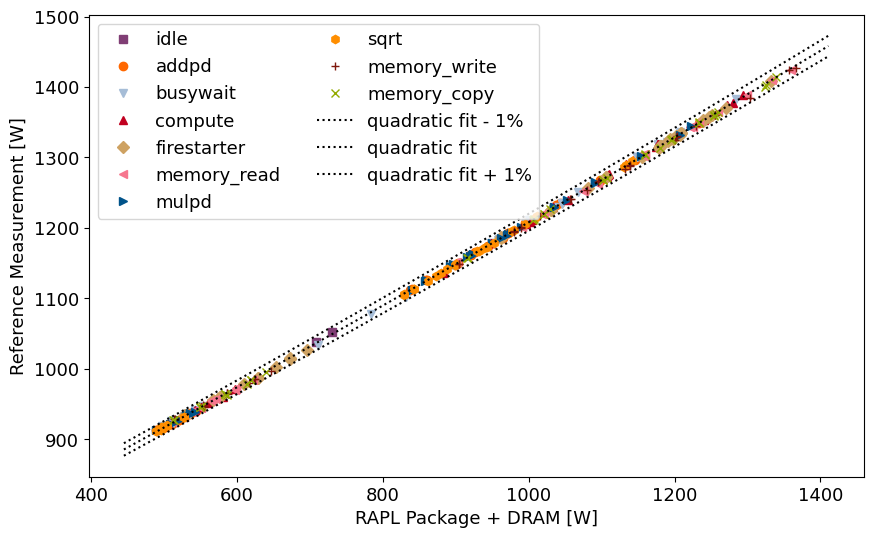

In [6]:
degree = 2

model = make_pipeline(PolynomialFeatures(degree), Ridge())
xses = experiments.power_x.to_numpy().reshape(-1, 1)
yses = experiments.power_y.to_numpy().reshape(-1, 1)
fit = model.fit(xses, yses)
names = {
    1: 'linear',
    2: 'quadratic',
    3: 'cubic'
}
model_name = names[degree]
params = mpl.rc_params()
params['font.size'] = 13
params['legend.fontsize'] = params['font.size']
params['figure.figsize'] = (10,6)

with mpl.rc_context(params):
    for kernel, k_group in experiments.groupby('kernel'):
        plt.plot(k_group.power_x, k_group.power_y, color=kernel.color, marker=kernel.marker, ls='', label=kernel.name)
    x_min, x_max = plt.gca().get_xlim()
    x_plot = np.linspace(x_min, x_max, 1000)
    fit_y_vals = model.predict(x_plot.reshape(-1,1))
    offset_in_percent = 1
    fit_y_vals_minus_percent = list(map(lambda x: (1 - offset_in_percent / 100) * x, model.predict(x_plot.reshape(-1,1))))
    fit_y_vals_plus_percent = list(map(lambda x: (1 + offset_in_percent / 100) * x, model.predict(x_plot.reshape(-1,1))))
    plt.plot(x_plot, fit_y_vals_minus_percent, ls=':', color='black', label='{} fit - {}%'.format(model_name, offset_in_percent))
    plt.plot(x_plot, fit_y_vals, ls=':', color='black', label='{} fit'.format(model_name))
    plt.plot(x_plot, fit_y_vals_plus_percent, ls=':', color='black', label='{} fit + {}%'.format(model_name, offset_in_percent))
    plt.xlabel(label_x)
    plt.ylabel(label_y)
    # plot.ideal(x_max, ls='-', color='gray', label='identity')

    # plt.gca().set_xlim(xmin=200)
    # plt.gca().set_ylim(ymin=750)
    plt.legend(loc='best', numpoints=1, fontsize=params['font.size'], ncol=2)
    plot.make_pdf('../../thesis/fig/rapl-validation')

    plt.show()

# fit(degree=2)